In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/subject-1321-csv/subject_1321.csv


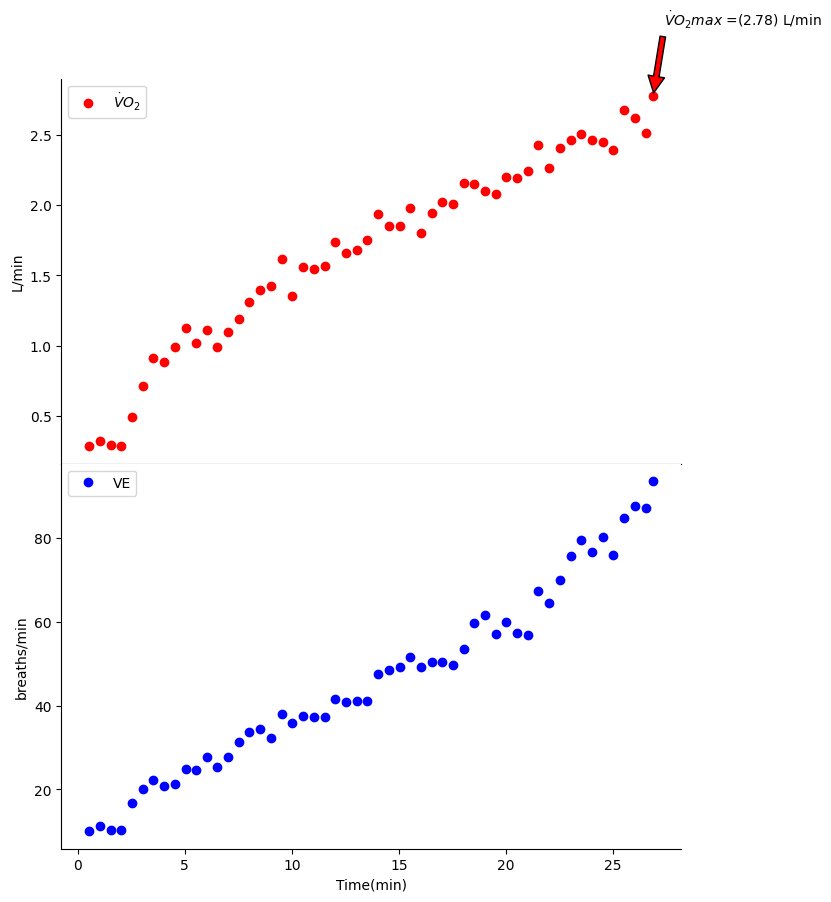

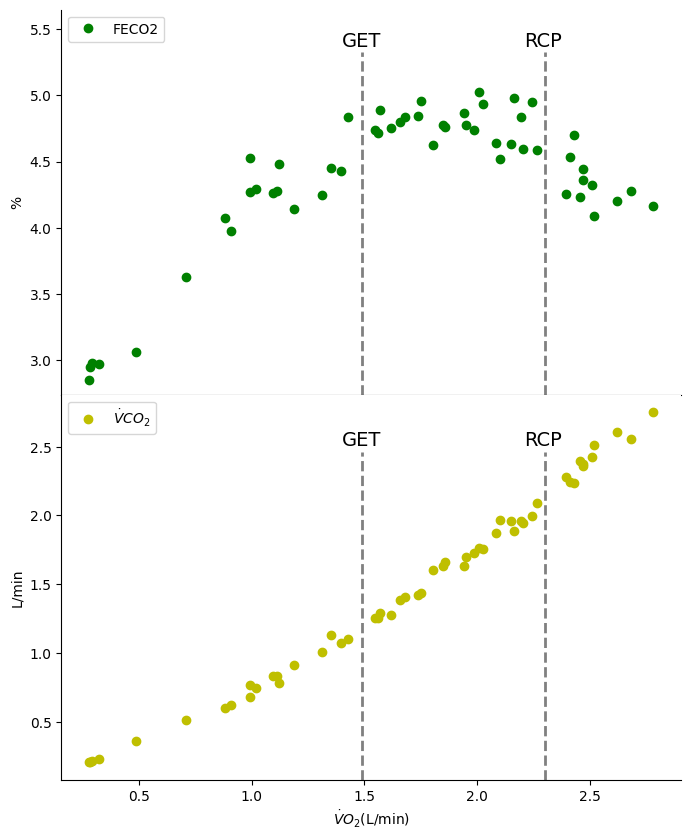

In [7]:
### Now all together in one code block that could run independently...
# lets take care of importing everything we need at once

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# changed subject file
df = pd.read_csv('/kaggle/input/subject-1321-csv/subject_1321.csv', header=[0], skiprows=[1,2,3])

# I previewed the headers in a different window and headers needed to be changed

# rename column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# first x-axis
x = df['TIME']

# second x-axis
x2 = df['VO2']

# first  y-axis
y = df['VO2']
y1 = df['VE']

# two new y-axis
y2 = df['FECO2']
y3 = df['VCO2']

# this is all Holash original code for first figure with two subplots

#Find VO2 max value 
ymax = max(y)

# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x[y.argmax()]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Note I increased the figure size here.

# this line seperates the two plots...
fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.

ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ .5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y, 'o', label=('$\dot VO_2$'), c='r' )
# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('L/min'))
ax[0].legend()
#note all these set features could be added in one line but reading it would be difficult

# Second plot of values down from the top
ax[1].plot(x, y1, 'o', label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].set(xlabel=('Time(min)'))
ax[1].legend()

# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-4.png", dpi=300, bbox_inches = "tight")
fig.show()

# the start of my two new plots

# two new plots
fig, ax1 = plt.subplots(2, 1, sharex=True, figsize=(8, 10))
fig.subplots_adjust(hspace=0)

# plotting first figure
ax1[0].plot(x2, y2, 'o', label=('FECO2'), c='g')
ax1[0].spines[['top', 'right']].set_visible(False)
ax1[0].set(ylabel=('%'))
ax1[0].legend(loc='upper left')

# changing height of figure while keeping proper scale
ymin, ymax = ax1[0].get_ylim()
ax1[0].set_ylim(ymin, ymax * 1.1)

# plotting second figure
ax1[1].plot(x2, y3, 'o', label=('$\dot VCO_2$'), c='y')
ax1[1].spines[['top', 'right']].set_visible(False)
ax1[1].set(xlabel=('$\dot VO_2$(L/min)'))
ax1[1].set(ylabel=('L/min'))
ax1[1].legend()

# plotting vertical lines
# GET and RCP first figure
GET = 1.49
RCP = 2.3
y_limits = ax1[0].get_ylim()
GETln = y_limits[1]
RCPln = y_limits[1]
ax1[0].axvline(x=GET, color='gray', linestyle='--', linewidth=2, ymin=0.0, ymax=0.89)
ax1[0].axvline(x=RCP, color='gray', linestyle='--', linewidth=2, ymin=0.0, ymax=0.89)
ax1[0].text(GET * 0.94, GETln * 0.95, 'GET', color='black', rotation=0, fontsize=14)
ax1[0].text(RCP * 0.96, RCPln * 0.95, 'RCP', color='black', rotation=0, fontsize=14)

# GET and RCP second figure
y_limits2 = ax1[1].get_ylim()
GETln2 = y_limits2[1]
RCPln2 = y_limits2[1]
ax1[1].axvline(x=GET, color='gray', linestyle='--', linewidth=2, ymin=0.0, ymax=0.85)
ax1[1].axvline(x=RCP, color='gray', linestyle='--', linewidth=2, ymin=0.0, ymax=0.85)
ax1[1].text(GET * 0.94, GETln2 * 0.87, 'GET', color='black', rotation=0, fontsize=14)
ax1[1].text(RCP * 0.96, RCPln2 * 0.87, 'RCP', color='black', rotation=0, fontsize=14)

# save and print figure
fig.savefig("FECO2-VCO2-2.png", dpi=300, bbox_inches = "tight")
fig.show()